In [1]:
!nrnivmodl /home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod
from neuron import h
import plotly.graph_objects as go
import matplotlib.colors as mcolors
from neuron.units import ms, mV
import plotly.io as pio
from matplotlib import pyplot, cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
from neuron import clear_gui_callback
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from numpy.linalg import pinv, eig
import numpy as np
from multiprocessing import Pool
font2={'family':'Times New Roman',
'weight':'bold',
'size': 10}
# 自定义刻度标签显示格式

from matplotlib.ticker import FuncFormatter
def format_func(value, tick_number):
    return f'{value:.0f}'  # 将刻度值格式化为小数点后两位

def plot_curve(ax2,x,y,color='black',title='', linestyle='-',xlim=[0,100],dx=20,
               ylim=[0,10],dy=5.0, fontsize=10, alpha = 1.0, xlabel='Time/ms', 
               ylabel = 'Frequency/Hz', label='',ynum_decimals =1, 
               nonscatter=True, s0=10):
    if nonscatter:
        if color:
            ax2.plot(x,y,color=color,linewidth=2,linestyle=linestyle,alpha=alpha, label=label)
        else:
            ax2.plot(x,y,linewidth=2,alpha=alpha, linestyle=linestyle,label=label)
    else:
        if color:
            ax2.scatter(x,y,color=color,linewidth=2,linestyle=linestyle,alpha=alpha, 
                        label=label, s=s0)
        else:
            ax2.scatter(x,y,linewidth=2,alpha=alpha, linestyle=linestyle,label=label,
                        s=s0)
        
    ax2.set_xlabel(xlabel,font2)
    ax2.set_ylabel(ylabel,font2)
    
    # def format_funcx(value, tick_number, num_decimals=xnum_decimals):
    #     if num_decimals==0:
    #         return f'{value:.0f}'
    #     return f'{value:.{num_decimals}f}'

    def format_funcy(value, tick_number, num_decimals=ynum_decimals):
        if num_decimals==0:
          return f'{value:.0f}'
        return f'{value:.{num_decimals}f}'

    # if dx:
    #     ax2.set_xticks(np.arange(xlim[0], xlim[1] + dx, dx))
    #     ax2.set_xticklabels(ax2.get_xticks(), fontsize=fontsize, weight='bold')
    #     ax2.set_xlim([xlim[0], xlim[1]])
    #     ax2.xaxis.set_major_formatter(FuncFormatter(format_funcx))

    if dy:
        ax2.set_yticks(np.arange(ylim[0], ylim[1] + dy, dy))
        ax2.set_yticklabels(ax2.get_yticks(), fontsize=fontsize, weight='bold')
        ax2.set_ylim([ylim[0], ylim[1]])
        ax2.yaxis.set_major_formatter(FuncFormatter(format_funcy))
        
  
    if xlim:
       ax2.set_xticks(np.arange(xlim[0],xlim[1]+dx,dx))
       ax2.set_xticklabels(np.arange(xlim[0],xlim[1]+dx,dx),fontsize=10,weight='bold')
       ax2.set_xlim(xlim)
    # if ylim:
    #    ax2.set_yticks(np.arange(ylim[0],ylim[1]+dy,dy))
    #    ax2.set_yticklabels(np.arange(ylim[0],ylim[1]+dy,dy),fontsize=10,weight='bold')
    #    ax2.set_ylim(ylim)
    if title:
       ax2.set_title('{0}'.format(title),fontsize=12,weight='bold')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    if label:
       ax2.legend(loc='best',prop=font2,edgecolor='white')

h.load_file('nrngui.hoc')
h.load_file("import3d.hoc")

morphologyFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/morphologies/cell1.asc"
biophysicalModelFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/models/L5PCbiophys1.hoc"
biophysicalModelTemplateFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/models/L5PCtemplate.hoc"

h.load_file(biophysicalModelFilename)
h.load_file(biophysicalModelTemplateFilename)

    

/home/wzl/anaconda/envs/neuron9/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
INFO : Using neuron-nightly Package (Developer Version)
/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance
cfiles =
Mod files: "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/CaDynamics_E2.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ca_HVA.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ca_LVAst.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/epsp.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ih.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Im.mod" "/home/wzl/LFPy/project/conductanc

--No graphics will be displayed.


1.0

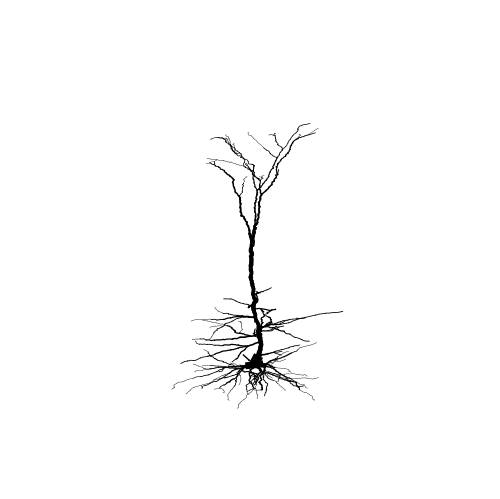

In [2]:
from neuron import h
from matplotlib import pyplot as plt

# 你的模型初始化和配置代码
L5PC = h.L5PCtemplate(morphologyFilename)
L5PC.soma[0].diam = 5.

# 绘图设置
ps = h.PlotShape(False)  # 创建PlotShape对象
ps.show(0)  # 不自动显示NEURON的窗口

# 使用Matplotlib进行绘图
ax = ps.plot(plt)

# # 设置坐标轴范围
ax.set_xlim([-300, 300])  # 设置x轴范围
ax.set_ylim([0, 1400])  # 设置y轴范围
ax.set_zlim([-600, 0])  # 设置z轴范围

# ps.view(-400,0, 0, 300, 0, 300, 100, 500)
ax.view_init(elev=280, azim=98)
ax.grid(False)
# 关闭坐标轴
ax.axis('off')
plt.savefig("model_visualization.eps", format='eps', dpi=300)
plt.show()


0.0746802999053033


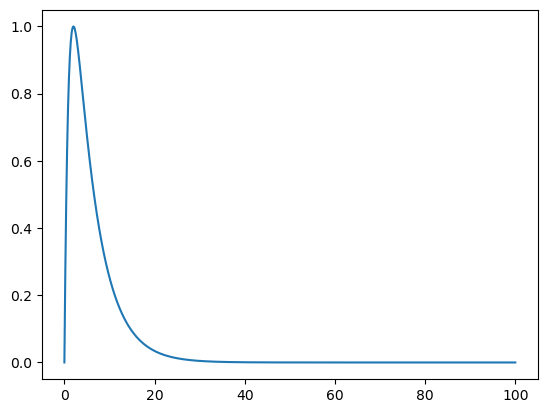

In [2]:
run_dt=0.1
syn_tau1 = 1.
syn_tau2 = 5.
t=np.arange(0,100+run_dt,run_dt)
NE = ((syn_tau1/syn_tau2)**(syn_tau1/(syn_tau2-syn_tau1))-(syn_tau1/syn_tau2)**(syn_tau2/(syn_tau2-syn_tau1)))**-1
uE = NE*(np.exp(-t/syn_tau2)-np.exp(-t/syn_tau1))
plt.plot(t,uE)
ground_truth = np.mean(uE)
print(ground_truth)

In [3]:
def shapeplot(var_dend,var_apic,
    figname = 'neurondendriticEPSP_fE1e-3', cmap = cm.jet,
    savefig = False, colorbarlabel='EPSP/mV', ticklabels=False,
    tickmin=0, tickmax=50, dt=10, setv=False, vmin=0., vmax=1.):
    
    L5PC = h.L5PCtemplate(morphologyFilename)
    L5PC.soma[0].diam = 5.
    for i in range(109):
        L5PC.apic[i].v = var_apic[i]
    
    for i in range(84):
        L5PC.dend[i].v = var_dend[i]
    
    L5PC.soma[0].v=0.
    L5PC.axon[0].v=0.
    L5PC.axon[1].v=0.
 
    v_vals = [seg.v for sec in h.allsec() for seg in sec]
    print(min(v_vals),max(v_vals))
    if setv:
        minv= vmin
        maxv = vmax
    else:
        minv= min(v_vals)
        maxv= max(v_vals)

            
    ps = h.PlotShape(False)  # False tells h.PlotShape not to use NEURON's gui
    ps.show(0)
    ps.variable('v')
    ps.scale(minv, maxv)
    ax = ps.plot(pyplot, cmap=cmap)

    # # 设置坐标轴范围
    ax.set_xlim([-300, 300])  # 设置x轴范围
    ax.set_ylim([0, 1400])  # 设置y轴范围
    ax.set_zlim([-600, 0])  # 设置z轴范围

    # ps.view(-400,0, 0, 300, 0, 300, 100, 500)
    ax.view_init(elev=280, azim=98)
    # 关闭网格
    ax.grid(False)
    # 关闭坐标轴
    ax.axis('off')
    
    # 保存为 EPS 格式
    if savefig:
        plt.savefig(figname+'.eps', format='eps')
    
    pyplot.show()
    
    
    
    # second figure
    ps = h.PlotShape(True)
    ps.show(0)
    ps.variable("v")
    ps.scale(minv, maxv)
    fig = ps.plot(plotly, cmap=cmap)
    ps.show(0)


    # Create a colormap function
    colormap = cm.ScalarMappable(cmap=cmap, 
    norm=mcolors.Normalize(vmin=0, vmax=1)).to_rgba

    # Map the normalized values to a Plotly colorscale as strings
    plotly_colorscale = [[v, f'rgb{tuple(int(255 * c) for c in colormap(v)[:3])}'] for v in np.linspace(0, 1, cmap.N)]

    # Create a separate scatter plot for the colorbar
    colorbar_trace = go.Scatter(
        x=[0],
        y=[0],
        mode='markers',
        marker=dict(
            colorscale=plotly_colorscale,
            cmin=minv,
            cmax=maxv,
            colorbar=dict(
                title=colorbarlabel,
                thickness=20  # Adjust the thickness of the colorbar
            ),
            showscale=True
        )
    )

    # Add the colorbar trace to the figure
    fig.add_trace(colorbar_trace)
    fig.update_xaxes(showticklabels=False, showgrid=True)
    fig.update_yaxes(showticklabels=False, showgrid=True)
    fig.update_layout(
        plot_bgcolor='rgba(0,0,0,0)'
    )

    # 创建自定义的颜色映射
    cmap = cmap
    colormap = cm.ScalarMappable(cmap=cmap, 
            norm=mcolors.Normalize(vmin=minv, vmax=maxv))

    # 创建一个新的图形和轴
    fig, ax = plt.subplots(figsize=(6, 1))

    # 绘制颜色条
    cbar = plt.colorbar(colormap, cax=ax, orientation='horizontal')
    cbar.set_label(colorbarlabel)
    if ticklabels:
        cbar.set_ticks(np.arange(tickmin, tickmax+dt, dt))
        cbar.set_ticklabels([f'{i}' for i in np.arange(tickmin, tickmax+dt, dt)])

    # 设置图的边界
    plt.tight_layout()

    if savefig:
        # 保存为 EPS 格式
        plt.savefig(figname+'colorbar'+'.eps', format='eps')

    # 显示图形（可选）
    plt.show()
    
    print(minv,maxv)

    

In [4]:
L5PC = h.L5PCtemplate(morphologyFilename)

0.00918088562080904 0.35039750042103834
0.18157883708947592 11.07980079810232
0.5341140431372133
0.0 11.07980079810232


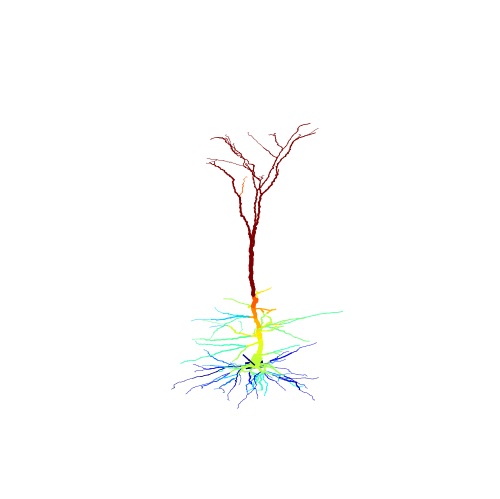

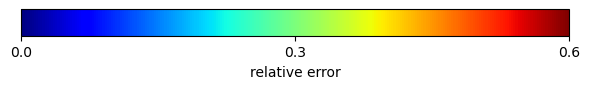

0.0 0.6
0.015244483915618688 0.4096932807542032
0.02814985115844236 0.7654804013233101
0.2678131738675377
0.0 0.7654804013233101


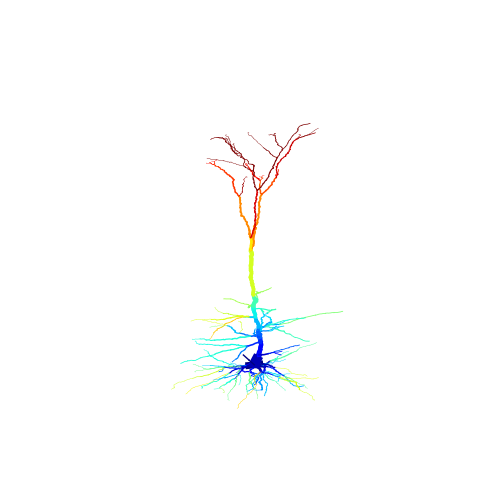

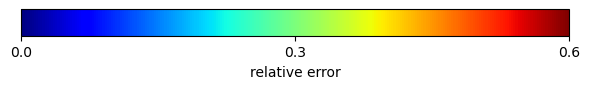

0.0 0.6


In [4]:

estimated_mean_cond = np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance/estimated_mean_cond_active_alldend_gIhbar_Ih0_05_fE5e4_relative_reversal_potential.txt")
estimated_mean_cond_apic= estimated_mean_cond[:109,:]
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= estimated_mean_cond[109:,:]
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4

var_dend = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))
shapeplot(var_dend, var_apic, 
        figname = 'active_local_us_fE5e4_relative_reversal_potential', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

var_dend = np.abs(estimated_mean_cond_trad_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_trad_apic - ground_truth*fE)/(ground_truth*fE)
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))
shapeplot(var_dend, var_apic, 
        figname = 'active_local_trad_fE5e4_relative_reversal_potential', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)


In [ ]:
estimated_lambdas = np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance/estimated_mean_cond_active_alldend_gIhbar_Ih0_05_fE5e4_relative_reversal_potential.txt")
estimated_lambdas_apic  = estimated_lambdas[:109,:]
estimated_lambdas_dend = estimated_lambdas[109:,:]
estimated_lambdas_apic_rise = -1./estimated_lambdas_apic[:,0]
estimated_lambdas_apic_decay = -1./estimated_lambdas_apic[:,1]
estimated_lambdas_dend_rise = -1./estimated_lambdas_dend[:,0]
estimated_lambdas_dend_decay = -1./estimated_lambdas_dend[:,1]

truth_rise = 1.0
var_dend_rise = np.abs(estimated_lambdas_dend_rise - truth_rise)/truth_rise
var_apic_rise = np.abs(estimated_lambdas_apic_rise - truth_rise)/truth_rise
truth_decay = 5.0
var_dend_decay = np.abs(estimated_lambdas_dend_decay - truth_decay)/truth_decay
var_apic_decay = np.abs(estimated_lambdas_apic_decay - truth_decay)/truth_decay
print(np.min(-1./estimated_lambdas[:,0]),np.max(-1./estimated_lambdas[:,0]))
print(np.min(-1./estimated_lambdas[:,1]),np.max(-1./estimated_lambdas[:,1]))
shapeplot(var_dend_rise, var_apic_rise, 
        figname = 'estimated_lambda_rise_active_fE5e4_relative_reversal_potential', 
        savefig = True, colorbarlabel='Diameter',ticklabels=False,
        tickmin=0., tickmax=1, dt=0.5, cmap=cm.jet, setv=True, vmin=0., vmax=1)

shapeplot(var_dend_decay, var_apic_decay, 
        figname = 'estimated_lambda_decay_active_fE5e4_relative_reversal_potential', 
        savefig = True, colorbarlabel='Diameter',ticklabels=False,
        tickmin=0., tickmax=1, dt=0.5, cmap=cm.jet, setv=True, vmin=0., vmax=1)


# passive neuron

In [20]:
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_passive_apicloc109_fI1e4.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_passive_dendloc84_fI1e4.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]
total_sec = 84 + 109

fE = 1e-4

var_dend = np.abs(estimated_mean_cond_trad_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_trad_apic - ground_truth*fE)/(ground_truth*fE)
ratio_exc_0_2 = sum(var_dend>0.2) + sum(var_apic>0.2)/total_sec

print(ratio_exc_0_2)
print(np.where(var_dend>0.2))
tip_dend = [2, 4, 5, 6, 10, 13, 14, 15, 19, 21,23,24,27,28,31,32,33,35, 37,38,40,41,44,45,49,50,51,54,56, 58, 59, 61, 62, 66,67, 69,70,72, 74, 76,77, 78, 80, 82, 83]
tip_apic = [8, 9, 10, 12, 13, 17, 18, 19, 23, 24, 25, 29, 31, 32, 33, 35, 39, 42, 43, 44, 47, 48, 49, 52, 55, 56, 58, 59, 63, 65, 66, 67, 70, 72, 73, 76, 77, 78, 79, 84, 85, 86, 87, 90, 91, 93, 95, 97, 98, 101, 102, 103, 105, 107, 108]

print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend)+np.sum(var_apic))/(len(var_dend)+len(var_apic)))


5.44559585492228
(array([ 5, 13, 69, 70, 72]),)
0.02022493912926459 0.251977811339807
0.04144703233605447 0.7967932188851832
0.2710292330532311


0.00027399222049024713 0.32972485724819417
5.304060048680805e-06 0.3677426993975695
0.09626731529643097
0.0 0.3677426993975695


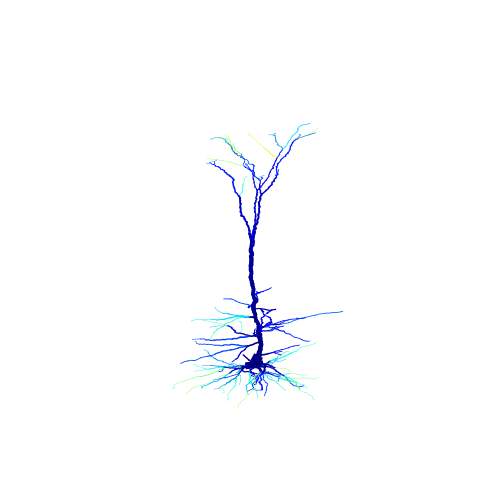

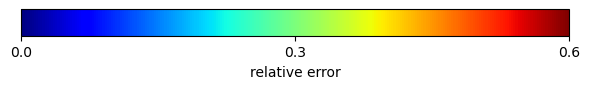

0.0 0.6
0.014464174134478232 0.40444630890096955
0.026105304734065166 0.7631396605621039
0.2579739616096117
0.0 0.7631396605621039


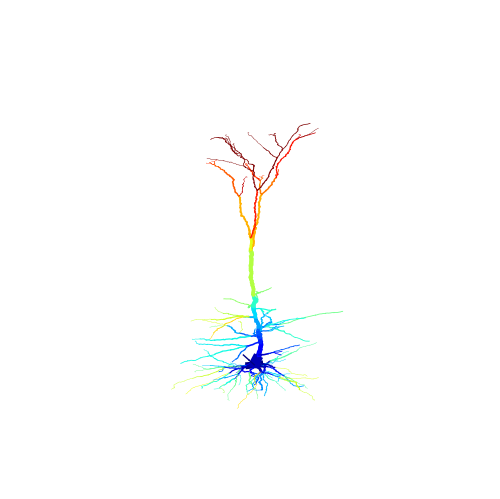

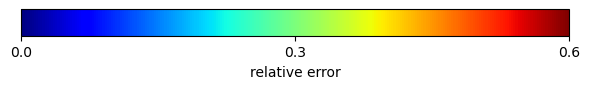

0.0 0.6


In [13]:
# _gIhbar_Ih0_05
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_passive_apicloc109_fE5e4.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_passive_dendloc84_fE5e4.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4

var_dend = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))
shapeplot(var_dend, var_apic, 
        figname = 'passive_local_us_fE5e4', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

var_dend = np.abs(estimated_mean_cond_trad_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_trad_apic - ground_truth*fE)/(ground_truth*fE)
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))
shapeplot(var_dend, var_apic, 
        figname = 'passive_local_trad_fE5e4', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)


0.00045422754493792456 0.05020596413731906
0.0016881931864629258 0.8125775203627777
0.13741371681129055
0.0 89.56200214820761


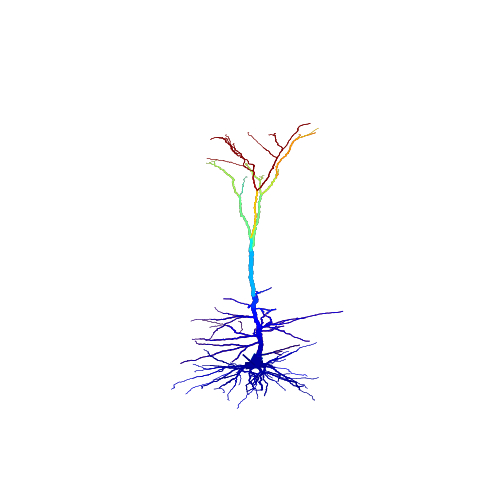

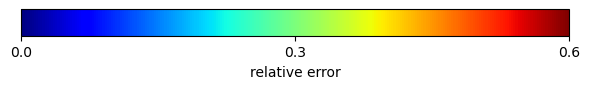

0.0 0.6
0.013078601294397425 0.20069621509676408
0.027418797141643907 0.6964073296385562
0.2138720001214826
0.0 89.56200214820761


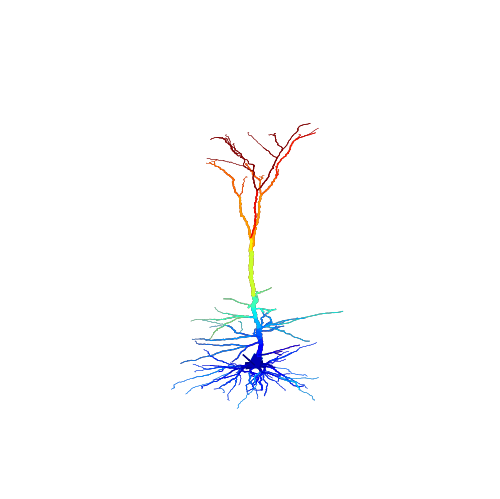

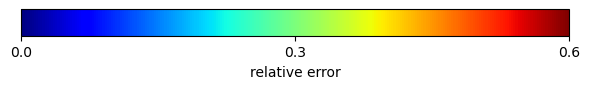

0.0 0.6


In [9]:
# _gIhbar_Ih0_05
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_active_apicloc109_fE1e4.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_active_dendloc84_fE1e4.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 1e-4

var_dend = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))
shapeplot(var_dend, var_apic, 
        figname = 'active_local_us_fE1e4', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

var_dend = np.abs(estimated_mean_cond_trad_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_trad_apic - ground_truth*fE)/(ground_truth*fE)
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))
shapeplot(var_dend, var_apic, 
        figname = 'active_local_trad_fE1e4', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)


9.930233492151148e-05 0.32510784132815457
0.00013177062008282693 0.2743326403794581
0.08637694485402138
0.0 0.32510784132815457


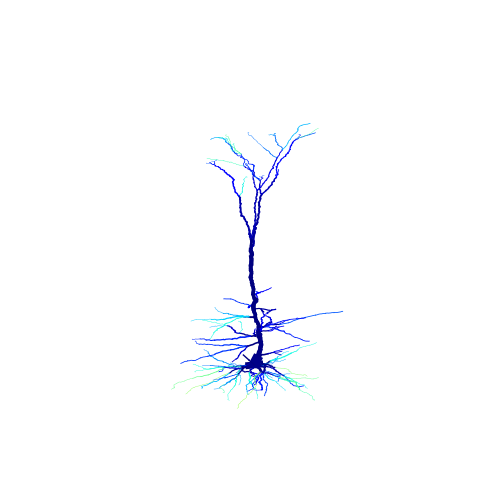

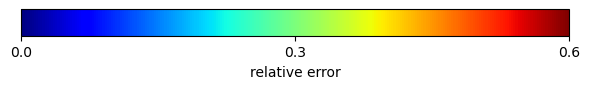

0.0 0.6
0.014109037084975866 0.40422546070562
0.025965113573374117 0.7649592424312619
0.25921795994811975
0.0 0.7649592424312619


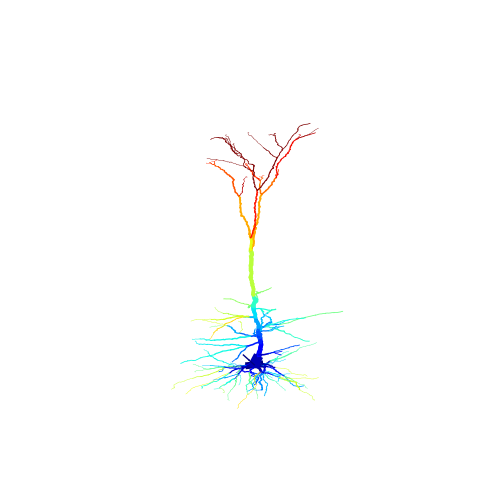

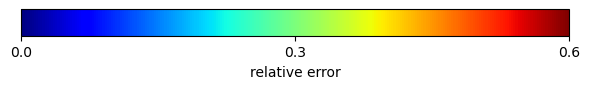

0.0 0.6


In [15]:
# _gIhbar_Ih0_05
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_active_apicloc109_fE5e4_blockIh.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_active_dendloc84_fE5e4_blockIh.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4

var_dend = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))
shapeplot(var_dend, var_apic, 
        figname = 'active_local_us_fE5e4_blockIh', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

var_dend = np.abs(estimated_mean_cond_trad_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_trad_apic - ground_truth*fE)/(ground_truth*fE)
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))
shapeplot(var_dend, var_apic, 
        figname = 'active_local_trad_fE5e4_blockIh', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)


0.0005372896502111483 0.33149215542213534
0.0003275785328497669 0.3597658873433855
0.09602598366932397
0.0 0.3597658873433855


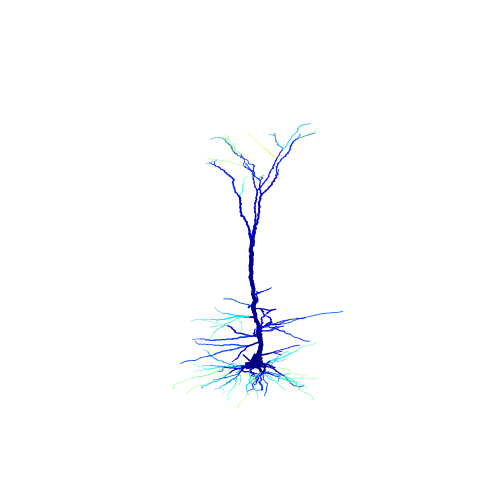

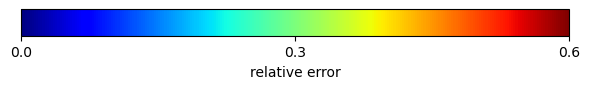

0.0 0.6
0.022408498831125917 0.4463141638035299
0.04219523566437738 0.8524666201981413
0.32072240651328404
0.0 0.8524666201981413


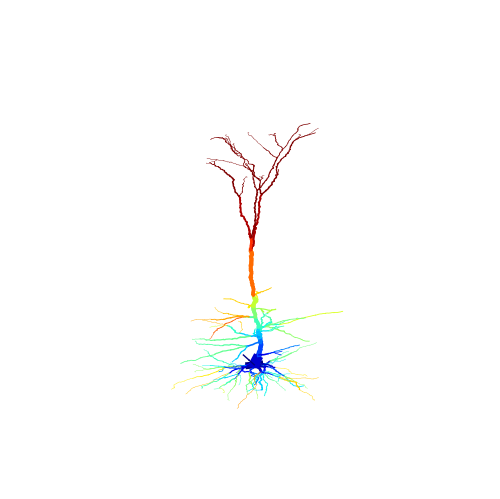

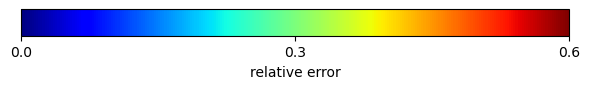

0.0 0.6


In [16]:
# _gIhbar_Ih0_05
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_passive_apicloc109_fI5e4.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_passive_dendloc84_fI5e4.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4

var_dend = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))
shapeplot(var_dend, var_apic, 
        figname = 'passive_local_us_fI5e4', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

var_dend = np.abs(estimated_mean_cond_trad_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_trad_apic - ground_truth*fE)/(ground_truth*fE)
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))
shapeplot(var_dend, var_apic, 
        figname = 'passive_local_trad_fI5e4', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)


0.00030644288683397434 0.33118757593449
0.00026869951700195065 0.406933897524763
0.1048244720516468
0.0 0.406933897524763


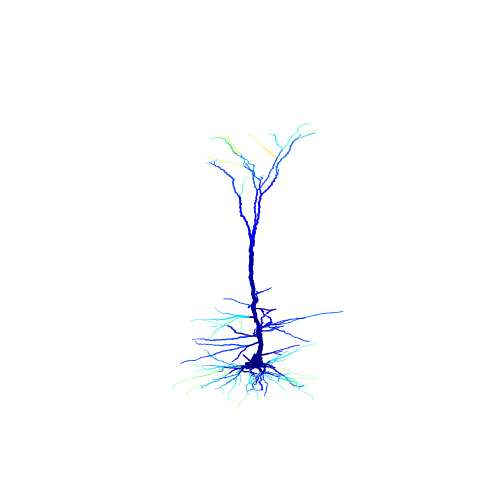

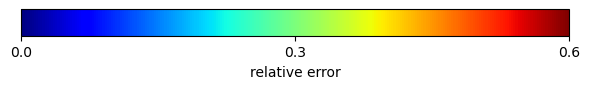

0.0 0.6
0.020663278283593888 0.44607066159778674
0.04081753918322888 0.8559559409750673
0.32173892450728897
0.0 0.8559559409750673


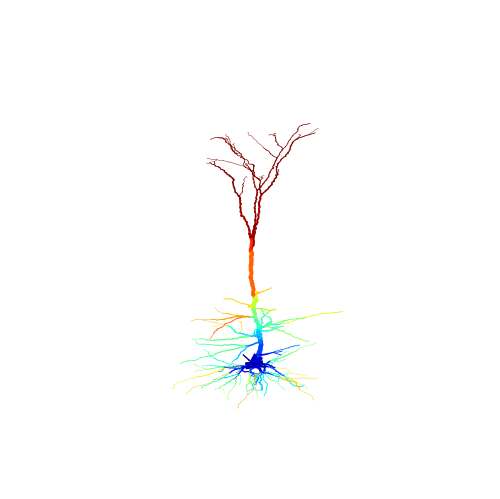

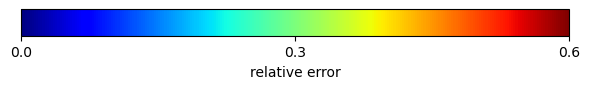

0.0 0.6


In [7]:
# _gIhbar_Ih0_05
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_active_apicloc109_fI5e4.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_active_dendloc84_fI5e4.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4

var_dend = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))
shapeplot(var_dend, var_apic, 
        figname = 'active_local_us_fI5e4', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

var_dend = np.abs(estimated_mean_cond_trad_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_trad_apic - ground_truth*fE)/(ground_truth*fE)
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))
shapeplot(var_dend, var_apic, 
        figname = 'active_local_trad_fI5e4', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)


0.0011431103907538177 0.3326497710389959
0.0008794383341147339 0.36398800069579257
0.09741425270664718
0.0 0.36398800069579257


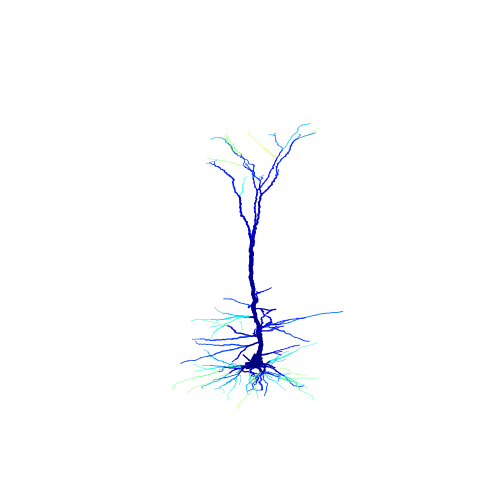

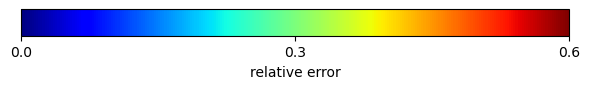

0.0 0.6
0.020555721641445587 0.4452820872953481
0.04062955618802657 0.8544903061864121
0.3207822742120707
0.0 0.8544903061864121


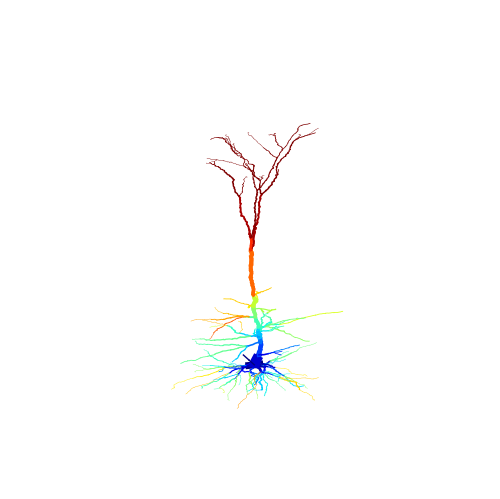

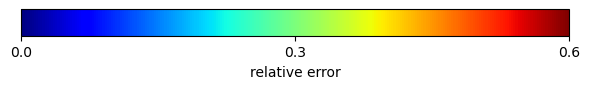

0.0 0.6


In [18]:
# _gIhbar_Ih0_05
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_active_apicloc109_fI5e4_blockIh.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_active_dendloc84_fI5e4_blockIh.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4

var_dend = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))
shapeplot(var_dend, var_apic, 
        figname = 'active_local_us_fI5e4_blockIh', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

var_dend = np.abs(estimated_mean_cond_trad_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_trad_apic - ground_truth*fE)/(ground_truth*fE)
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))
shapeplot(var_dend, var_apic, 
        figname = 'active_local_trad_fI5e4_blockIh', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)


In [9]:
# _gIhbar_Ih0_05
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_passive_apicloc109_fE5e4.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_passive_dendloc84_fE5e4.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4

var_dend = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))
# shapeplot(var_dend, var_apic, 
#         figname = 'passive_local_us_fE5e4', 
#         savefig = True, colorbarlabel='relative error', ticklabels = True, 
#         tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

var_dend = np.abs(estimated_mean_cond_trad_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_trad_apic - ground_truth*fE)/(ground_truth*fE)
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))
# shapeplot(var_dend, var_apic, 
#         figname = 'passive_local_trad_fE5e4', 
#         savefig = True, colorbarlabel='relative error', ticklabels = True, 
#         tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)


0.00027399222049024713 0.32972485724819417
5.304060048680805e-06 0.3677426993975695
0.09626731529643097
0.014464174134478232 0.40444630890096955
0.026105304734065166 0.7631396605621039
0.2579739616096117


0.0229965837656565 0.5757845566821895
0.041753596150203694 0.8911327092386592
0.0 0.8911327092386592


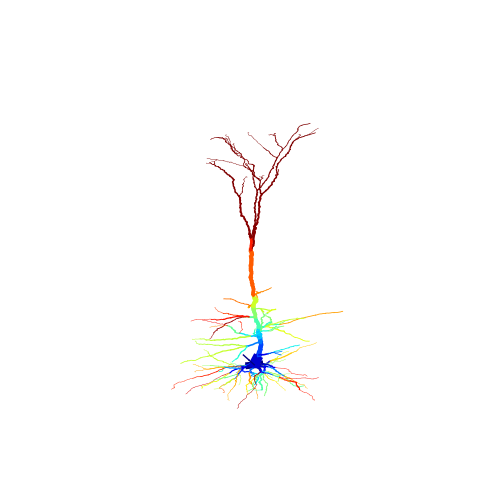

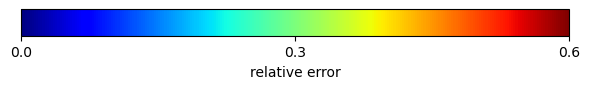

0.0 0.6


In [24]:
# _gIhbar_Ih0_05
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_active_apicloc109_fI1e3_gIhbar_Ih0_05.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_active_dendloc84_fI1e3_gIhbar_Ih0_05.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 1e-3

var_dend = np.abs(estimated_mean_cond_trad_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_trad_apic - ground_truth*fE)/(ground_truth*fE)
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
shapeplot(var_dend, var_apic, 
        figname = 'active_local_trad_fI1e3', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

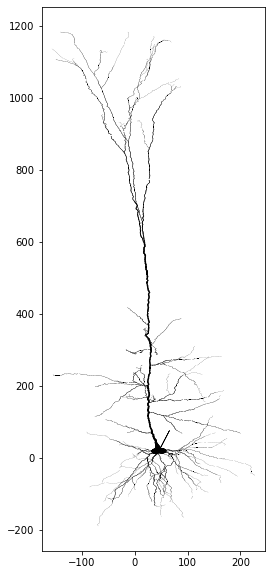

In [7]:
cell_secs = []
for sec in h.allsec(): 
    cell_secs.append(sec)
    sec.nseg = 100

locs = np.empty((100, 2))
for i in range(len(locs)):
    locs[i, 0] = int(np.random.randint(83))
    locs[i, 1] = np.random.random()
#----------------------------------------------------------------------------
# Get numbers for plotting cell morphology
# cell: [xstart xend ystart yend diamstart diamend]
# synapse: [x, y]
h.define_shape()
cell_coordinates = []
for sec in cell_secs:
    sec.push()
    for stepCount in np.arange(1, h.n3d()):
        stepCount =  float(stepCount)
        cell_coordinates.append([h.x3d(stepCount-1), h.x3d(stepCount),
                                h.y3d(stepCount-1), h.y3d(stepCount),
                                    h.diam3d(stepCount-1), h.diam3d(stepCount)])
    h.pop_section()

set_dends = set(locs[:,0])

# I don't know how to work with sets, so convert it to an array
set_dends = np.array(list(set_dends))
dend_coord = []
for i_dend in np.arange(0,len(set_dends)):
    syn_coordinates = []
    d_dend = int(set_dends[i_dend])
    if (d_dend > -1):
        L5PC.dend[d_dend].push()
    else :
        L5PC.soma.push()
    for stepCount in np.arange(1, h.n3d()):
        stepCount =  float(stepCount)
        syn_coordinates.append([h.x3d(stepCount-1), h.x3d(stepCount),
                                h.y3d(stepCount-1), h.y3d(stepCount), 
                                h.diam3d(stepCount-1), h.diam3d(stepCount)])
    h.pop_section()
    dend_coord.append(syn_coordinates)
#----------------------------------------------------------------------------

# Make plot
plt.figure(figsize=(4, 10))
# Cell
for pt in np.arange(len(cell_coordinates)):
    xstart, xend = cell_coordinates[pt][0], cell_coordinates[pt][1]
    ystart, yend = cell_coordinates[pt][2], cell_coordinates[pt][3]
    lx = xend-xstart
    ly = yend-ystart
    l = np.sqrt(np.dot([lx,ly],[lx,ly]))
    diamstart = cell_coordinates[pt][4] / 2
    diamend = cell_coordinates[pt][5] / 2

    if diamstart > 8: diamstart=diamstart/3.5
    if diamend > 8: diamend=diamend/3.5

    if l>0:
        plt.fill([xstart+2*diamstart*ly/(2*l), xend+2*diamend*ly/(2*l),
                    xend-2*diamend*ly/(2*l), xstart-2*diamstart*ly/(2*l)], 
                    [ystart-2*diamstart*lx/(2*l), yend-2*diamend*lx/(2*l),
                    yend+2*diamend*lx/(2*l), ystart+2*diamstart*lx/(2*l)],
                    'k', lw=0) 

    c1 = plt.Circle((xstart, ystart), diamstart, color='k', lw=0)
    c2 = plt.Circle((xend, yend), diamend, color='k', lw=0) 
    plt.gca().add_patch(c1)
    plt.gca().add_patch(c2)

PSP

0.014464174134478232 0.40444630890096955
0.026105304734065166 0.7631396605621039
0.2579739616096117
0.0 0.7631396605621039


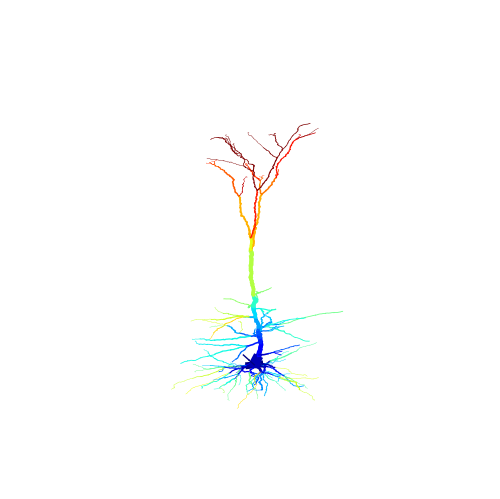

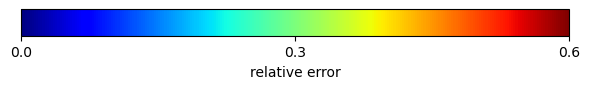

0.0 0.6


In [19]:
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_passive_apicloc109_fE5e4.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_passive_dendloc84_fE5e4.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4

var_dend = np.abs(estimated_mean_cond_trad_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_trad_apic - ground_truth*fE)/(ground_truth*fE)
mean = (np.sum(var_dend) + np.sum(var_apic))/(len(var_dend) + len(var_apic))

print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print(mean)
shapeplot(var_dend,var_apic,
        figname = 'passive_local_trad_fE5e4', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

0.0005372896502111483 0.33149215542213534
0.0003275785328497669 0.3597658873433855
0.09602598366932397
0.0 0.3597658873433855


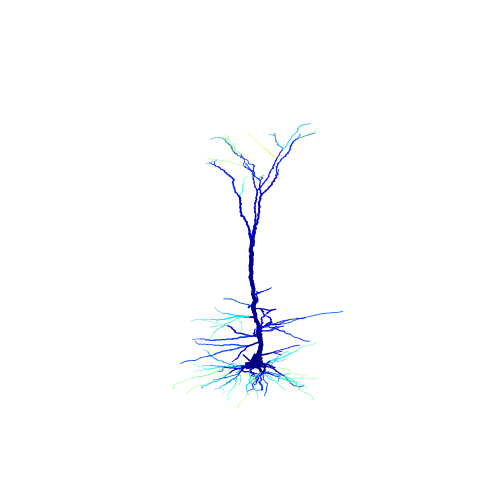

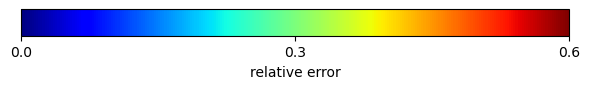

0.0 0.6


In [5]:
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_passive_apicloc109_fI5e4.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_passive_dendloc84_fI5e4.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4

var_dend = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)
mean = (np.sum(var_dend) + np.sum(var_apic))/(len(var_dend) + len(var_apic))

print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print(mean)
shapeplot(var_dend,var_apic,
        figname = 'passive_local_us_fI5e4', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

0.00030644288683397434 0.33118757593449
0.00026869951700195065 0.406933897524763
0.1048244720516468
0.0 0.406933897524763


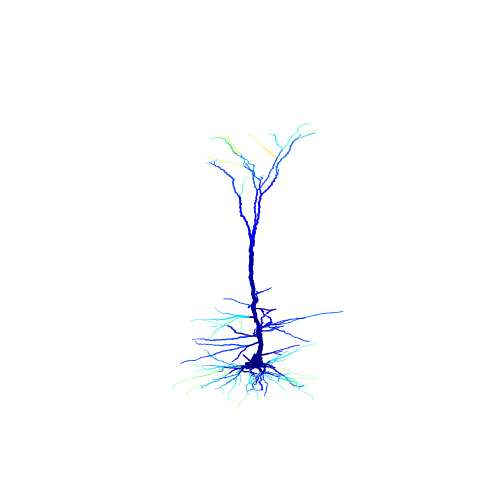

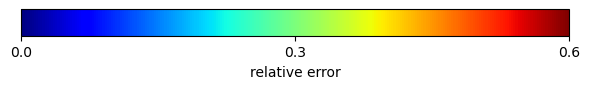

0.0 0.6


In [5]:
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_active_apicloc109_fI5e4.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_active_dendloc84_fI5e4.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4

var_dend = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)
mean = (np.sum(var_dend) + np.sum(var_apic))/(len(var_dend) + len(var_apic))

print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print(mean)
shapeplot(var_dend,var_apic,
        figname = 'active_local_us_fI5e4', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

0.020663278283593888 0.44607066159778674
0.04081753918322888 0.8559559409750673
0.32173892450728897
0.0 0.8559559409750673


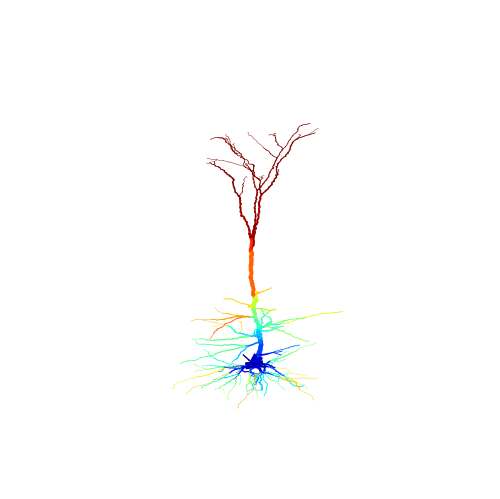

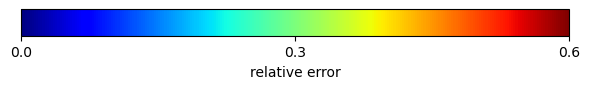

0.0 0.6


In [6]:
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_active_apicloc109_fI5e4.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_active_dendloc84_fI5e4.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4

var_dend = np.abs(estimated_mean_cond_trad_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_trad_apic - ground_truth*fE)/(ground_truth*fE)
mean = (np.sum(var_dend) + np.sum(var_apic))/(len(var_dend) + len(var_apic))

print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print(mean)
shapeplot(var_dend,var_apic,
        figname = 'active_local_trad_fI5e4', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

0.00046451138252831065 0.295642031568926
4.0115055844458626e-05 1.2789204921716106
0.13529810490954805
0.0 1.2789204921716106


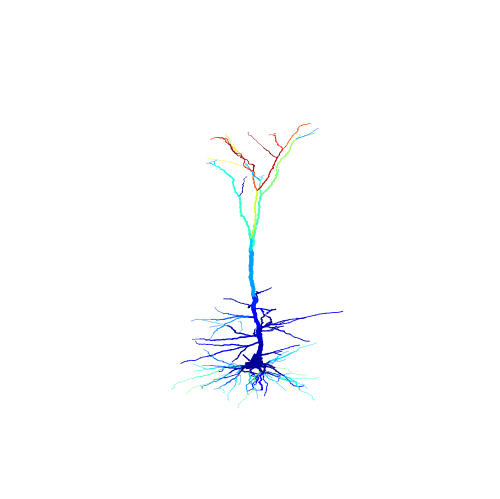

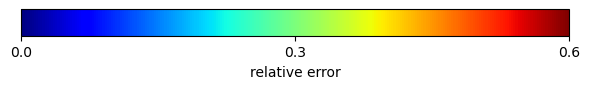

0.0 0.6


In [7]:
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_active_apicloc109_fE5e4.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_active_dendloc84_fE5e4.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4

var_dend = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)
mean = (np.sum(var_dend) + np.sum(var_apic))/(len(var_dend) + len(var_apic))

print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print(mean)
shapeplot(var_dend,var_apic,
        figname = 'active_local_us_fE5e4', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

In [22]:
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_active_apicloc109_fI5e4.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_active_dendloc84_fI5e4.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4

var_dend_trad = np.abs(estimated_mean_cond_trad_dend - ground_truth*fE)/(ground_truth*fE)
var_apic_trad = np.abs(estimated_mean_cond_trad_apic - ground_truth*fE)/(ground_truth*fE)
mean_trad = (np.sum(var_dend_trad) + np.sum(var_apic_trad))/(len(var_dend_trad) + len(var_apic_trad))


var_dend_us = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
var_apic_us = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)
mean_us = (np.sum(var_dend_us) + np.sum(var_apic_us))/(len(var_dend_trad) + len(var_apic_trad))

# print(np.min(var_dend),np.max(var_dend))
# print(np.min(var_apic),np.max(var_apic))
print(mean_trad)
print(mean_us)
# shapeplot(var_dend,var_apic,
#         figname = 'active_local_trad_fE5e4', 
#         savefig = True, colorbarlabel='relative error', ticklabels = True, 
#         tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

0.32173892450728897
0.1048244720516468


0.014109037084975866 0.40422546070562
0.025965113573374117 0.7649592424312619
0.25921795994811975
0.0 0.7649592424312619


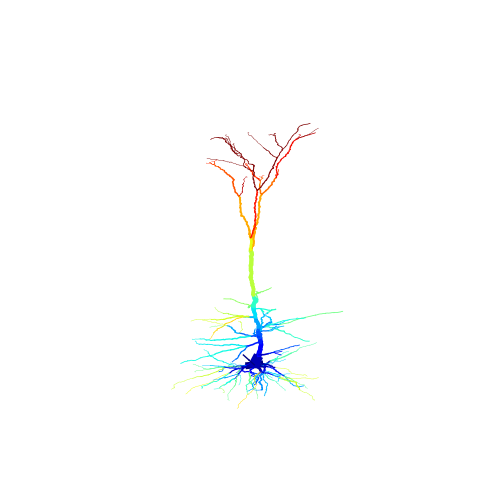

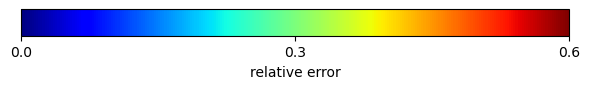

0.0 0.6


In [9]:
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_active_apicloc109_fE5e4_blockIh.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_active_dendloc84_fE5e4_blockIh.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4

var_dend = np.abs(estimated_mean_cond_trad_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_trad_apic - ground_truth*fE)/(ground_truth*fE)
mean = (np.sum(var_dend) + np.sum(var_apic))/(len(var_dend) + len(var_apic))

print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print(mean)
shapeplot(var_dend,var_apic,
        figname = 'active_local_trad_fE5e4_blockIh', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

9.930233492151148e-05 0.32510784132815457
0.00013177062008282693 0.2743326403794581
0.08637694485402138
0.0 0.32510784132815457


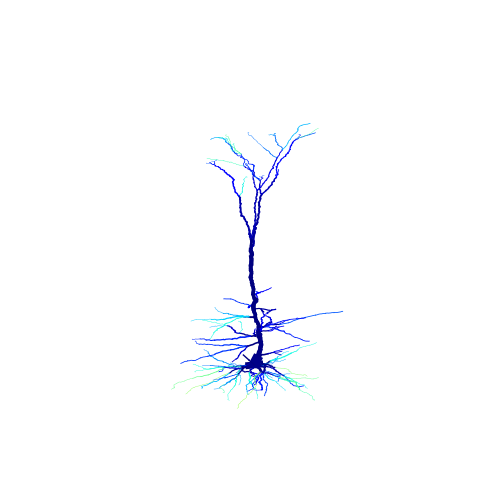

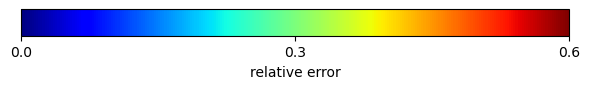

0.0 0.6


In [10]:
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_active_apicloc109_fE5e4_blockIh.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_active_dendloc84_fE5e4_blockIh.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4

var_dend = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)
mean = (np.sum(var_dend) + np.sum(var_apic))/(len(var_dend) + len(var_apic))

print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print(mean)
shapeplot(var_dend,var_apic,
        figname = 'active_local_us_fE5e4_blockIh', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

0.00046451138252831065 0.295642031568926
4.0115055844458626e-05 1.2789204921716106
0.13529810490954805
0.0 1.2789204921716106


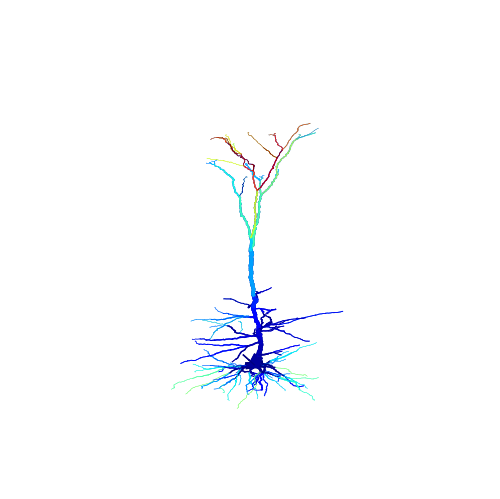

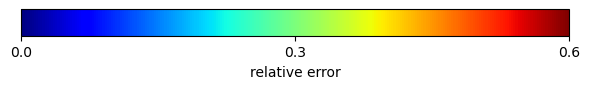

0.0 0.6


In [16]:
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_active_apicloc109_fE5e4.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_active_dendloc84_fE5e4.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4

var_dend = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)
mean = (np.sum(var_dend) + np.sum(var_apic))/(len(var_dend) + len(var_apic))

print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print(mean)
shapeplot(var_dend,var_apic,
        figname = 'active_local_us_fE5e4', 
        savefig = True, colorbarlabel='relative error', ticklabels = True, 
        tickmin = 0, tickmax = 0.6, dt = 0.3, cmap = cm.jet, setv = True, vmin=0., vmax=0.6)

# EPSP

In [8]:
EPSP_apic= np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance/EPSP_passive_apicloc109_fE5e4.txt")
EPSP_dend= np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance/EPSP_passive_dendloc84_fE5e4.txt")
print(np.min(EPSP_apic),np.max(EPSP_apic))
print(np.min(EPSP_dend),np.max(EPSP_dend))
print((np.sum(EPSP_apic)+np.sum(EPSP_dend))/(len(EPSP_apic)+len(EPSP_dend)))

0.08211300099483765 0.6339137133341666
0.3568348014540419 0.6562004688004066
0.43419809065156195


# error

In [13]:
# _gIhbar_Ih0_05
estimated_mean_cond_apic= np.loadtxt("estimated_mean_cond_passive_apicloc109_fE1e4.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("estimated_mean_cond_passive_dendloc84_fE1e4.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4
var_dend = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)
print("intercept method:")
# print(np.min(var_dend),np.max(var_dend))
# print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))

var_dend = np.abs(estimated_mean_cond_trad_dend - ground_truth*fE)/(ground_truth*fE)
var_apic = np.abs(estimated_mean_cond_trad_apic - ground_truth*fE)/(ground_truth*fE)
print("traditional method:")
# print(np.min(var_dend),np.max(var_dend))
# print(np.min(var_apic),np.max(var_apic))
print((np.sum(var_dend) + np.sum(var_apic))/(len(var_apic)+len(var_dend)))


intercept method:
0.8047522116623064
traditional method:
0.8404874835962839
